In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/largesongdataset.csv')
genres = pd.read_csv('data/data_w_genres.csv')

In [6]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
genres.tail()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
32534,김효근,0.939,0.1740,341821.0,0.3210,0.756000,0.6950,-13.4110,0.0422,138.300,0.0554,0.0,3,1,1,[]
32535,나율,0.717,0.5915,241281.5,0.4735,0.000000,0.1050,-6.5885,0.0537,107.599,0.5075,16.0,1,1,4,[]
32536,미스티,0.416,0.6860,216715.0,0.8220,0.000000,0.1100,-6.3000,0.0802,122.047,0.6250,0.0,5,0,2,[]
32537,시온 Zion & 한해 Hanhae of 팬텀 Phantom,0.288,0.7390,242480.0,0.4750,0.000000,0.0757,-8.9200,0.3790,81.490,0.8000,8.0,2,0,2,[]
32538,조정현,0.568,0.4470,237688.0,0.2150,0.000001,0.0649,-16.4780,0.0272,71.979,0.1770,30.0,10,1,2,['classic korean pop']


In [5]:
df = df.drop_duplicates('id', keep='last')
df['index'] = df.index
songData = df[['index', 'year','artists', 'name', 'id']].copy()

In [6]:
songData.tail()

,index,year,artists,name,id
174384,174384,2020,"['DJ Combo', 'Sander-7', 'Tony T']",The One,46LhBf6TvYjZU2SMvGZAbn
174385,174385,2021,['Alessia Cara'],A Little More,7tue2Wemjd0FZzRtDrQFZd
174386,174386,2020,['Roger Fly'],Together,48Qj61hOdYmUCFJbpQ29Ob
174387,174387,2021,['Taylor Swift'],champagne problems,1gcyHQpBQ1lfXGdhZmWrHP
174388,174388,2020,['Roger Fly'],Improvisations,57tgYkWQTNHVFEt6xDKKZj


In [7]:
# df.set_index("id", drop=True, inplace=True)
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,index
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020,174384
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021,174385
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020,174386
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021,174387
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020,174388


In [8]:
def wrangle(df):
    
    df = df.copy()
    # Removing very "speechy" tracks that could be audiobooks or similar.
    df = df[(df.speechiness < 0.8)]
    df = df[(df.loudness < 0)]
    
    
    """
    Typically, tempo is measured according to beats per minute (bpm) and is divided into:
    
    prestissimo (>200 bpm), 
    presto (168–200 bpm), 
    allegro (120–168 bpm), 
    moderato (108–120 bpm), 
    andante (76–108 bpm), 
    adagio (66–76 bpm), 
    larghetto (60–66 bpm), 
    largo (40–60 bpm)
    """
    condition = [df['tempo'].between(200, 400 ), 
                 df['tempo'].between(168, 200),
                 df['tempo'].between(120, 168),
                 df['tempo'].between(108, 120),
                 df['tempo'].between(76, 108), 
                 df['tempo'].between(66, 76), 
                 df['tempo'].between(60, 66), 
                 df['tempo'].between(40, 60)]

    tempo_basket = ['Prestissimo', 
                    'Presto', 
                    'Allegro', 
                    'Moderato', 
                    'Anadante', 
                    'Adagio', 
                    'Larghetto', 
                    'Largo']
    
    
    """
    Make a new column called df['tempo'] using the above conditional.
    Gives a label to the numerical value of tempo.
    """
    df['Tempo Basket'] = np.select(condition, tempo_basket, 'none')
    
    
    
    """
    Scaling values to be between 0-1.
    * df['loudness'] was originally a negative to 0 number so I used .min()*
    """ 
    df['acousticness'] = df['acousticness']/ df['acousticness'].max()
    df['danceability'] = df['danceability'] / df['danceability'].max()
    df['speechiness'] = df['speechiness'] / df['speechiness'].max()
    df['tempo'] = df['tempo'] / df['tempo'].max()
    df['loudness'] = df['loudness'] / df['loudness'].min()
    
    
    #  Changing mil secs to seconds
    df['duration_sec'] = (df['duration_ms']/1000).round(2)
    
    # Clean artists column
    df['artists'] = df['artists'].str.strip('[]')
    df['artists'] = df['artists'].str.strip('"')
    df['artists'] = df['artists'].str.strip("'")


    
    return df


data = wrangle(df)
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,index,Tempo Basket,duration_sec
0,0.994980,Mamie Smith,0.605263,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,Keep A Song In Your Soul,12,1920,0.117146,0.615900,0.6340,1920,0,Allegro,168.33
1,0.645582,Screamin' Jay Hawkins,0.862348,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,...,I Put A Spell On You,7,1920-01-05,0.066834,0.356823,0.9500,1920,1,Anadante,150.20
2,0.996988,Mamie Smith,0.654858,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,Golfing Papa,4,1920,0.217772,0.400810,0.6890,1920,2,Anadante,163.83
3,0.000174,Oscar Velazquez,0.738866,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.053191,0.525640,0.0422,1920,3,Allegro,422.09
4,0.296185,Mixe,0.712551,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Xuniverxe,2,1920-10-01,0.096120,0.501324,0.2990,1920,4,Allegro,165.22


In [9]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year', 'index', 'Tempo Basket', 'duration_sec'],
      dtype='object')

In [10]:
# DO NOT CHANGE ORDER OF ROWS! Separating a few columns for future use
dictionary = data[['artists',
                   'name',
                   'id',
                   'Tempo Basket']]

In [11]:
#  Features to drop
# drop_features = ['duration_ms','id', 'release_date', 
#                  'popularity', 'explicit', 'duration_sec', 
#                  'mode', 'artists', 'name', 'year']
# data = data.drop(drop_features, axis=1)

In [12]:
# Save final dataset for the repository and EDA
data.to_csv("spotify-largeset.csv", index=False)
songData.to_csv("song-data.csv")
# dictionary.to_csv("spotify-idkeys.csv", index=False)

In [13]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,name,popularity,release_date,speechiness,tempo,valence,year,index,Tempo Basket,duration_sec
174384,0.009207,"DJ Combo', 'Sander-7', 'Tony T",0.801619,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,...,The One,0,2020-12-25,0.044556,0.517324,0.186,2020,174384,Allegro,147.62
174385,0.798193,Alessia Cara,0.434211,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,...,A Little More,0,2021-01-22,0.045056,0.388942,0.228,2021,174385,Anadante,144.72
174386,0.809237,Roger Fly,0.679150,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,...,Together,0,2020-12-09,0.035294,0.443757,0.714,2020,174386,Moderato,218.15
174387,0.923695,Taylor Swift,0.467611,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,...,champagne problems,69,2021-01-07,0.047184,0.703549,0.320,2021,174387,Presto,244.00
174388,0.239960,Roger Fly,0.685223,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,...,Improvisations,0,2020-12-09,0.032290,0.460800,0.747,2020,174388,Moderato,197.71


In [14]:
# from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree

In [15]:
# Select numerical features, relevant to audio track
df_numerics =  data.drop(columns=['id', 'name', 'artists', 'index', 'release_date', 
                                  'Tempo Basket', 'year', 'duration_ms', 'explicit'], axis=1)

# Apply Standard Scaler
# Create a numpy array where the numerical features are scaled to a mean of 0 and a standard deviation of 1.
df_scaled = StandardScaler().fit_transform(df_numerics)

# Apply the model
tree = KDTree(df_scaled)

In [16]:
df_numerics.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo',
       'valence', 'duration_sec'],
      dtype='object')

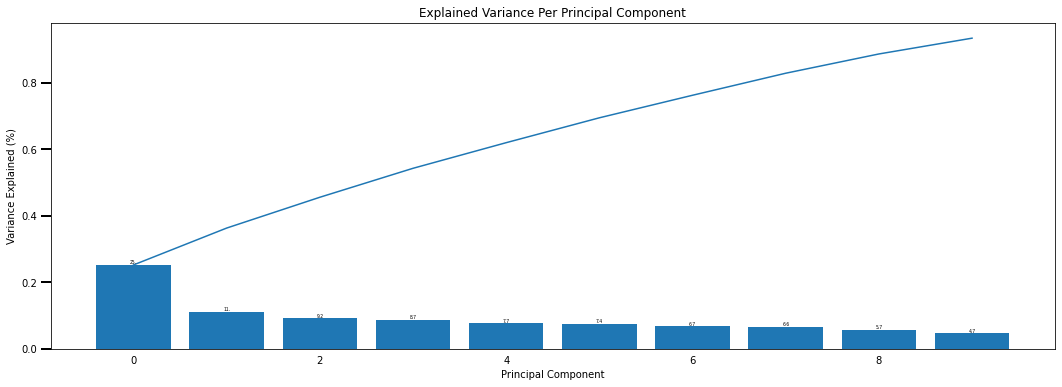

In [17]:
# Standardize, perform PCA, scree plot
# df_new = df.drop(['artists', 'name', 'Tempo Basket', 'year'], axis=1) #  , 'year'

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(df_scaled)

# Apply PCA to the data
pca = PCA(10)
pca_features = pca.fit_transform(x)



# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    INPUT: pca - the result of instantian of PCA in scikit learn      
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=10)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

In [18]:
# import pickle
# kdTree_file = 'kdTree.pickle'
# pickle.dump(song_cluster_pipeline, open(kdTree_file, 'wb'))

In [19]:
# Query the KDTree model for k nearest neighbors.
# (Alternatively) we can use query_radius
# Check sklearn docs 
# https://scikit-learn.org/stable/modules/generated/
# sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree

num_of_songs = 15
dist, indxs = tree.query(df_scaled, k=num_of_songs+1)

In [20]:
# Create column names first
column_names = ['Searched_Song']
for i in range(1, num_of_songs+1):
    column_names.append(f'Nearest_Song{i}')
    
# Calculate scores from distances
scores = (1 - ((dist - dist.min()) / (dist.max() - dist.min()))) * 100
dist_df = pd.DataFrame(scores.tolist(), columns=column_names)

# Limit decimal place output to 2
dist_df = dist_df.round(decimals=2)

# Replace Searched Song score with the track_id
dist_df['Searched_Song'] = df.id

# Print the shape of the dataframe
print(f'df.shape = {dist_df.shape}')

# Check distances of similar top 10 nearest songs
dist_df.head()

df.shape = (165755, 16)


,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10,Nearest_Song11,Nearest_Song12,Nearest_Song13,Nearest_Song14,Nearest_Song15
0,0cS0A1fUEUd1EW3FcF8AEI,90.79,90.71,90.26,89.05,88.37,88.34,87.94,87.93,87.73,87.53,86.84,85.79,85.73,85.67,85.66
1,0hbkKFIJm7Z05H8Zl9w30f,88.64,87.23,86.67,86.45,86.24,85.40,85.24,84.94,84.89,84.53,84.48,84.42,84.40,84.22,84.15
2,11m7laMUgmOKqI3oYzuhne,87.95,86.63,85.70,85.31,84.83,84.73,84.65,84.63,84.48,84.01,83.94,83.86,83.54,83.34,83.22
3,19Lc5SfJJ5O1oaxY0fpwfh,89.56,88.90,88.89,88.85,88.03,87.97,87.82,87.70,87.70,87.57,87.44,87.33,87.25,87.09,87.02
4,2hJjbsLCytGsnAHfdsLejp,86.29,86.23,85.38,85.06,84.96,83.76,83.67,83.33,83.30,83.14,82.96,82.92,82.80,82.77,82.73


In [21]:
# Making an array of the Track IDs
track_ids = np.array(df.id)

# A function that creates list of the each song with its nearest neighbors
def find_similars(track_ids, indxs):
    """For each track in the dataset find similar songs"""
    similars = []
    for row in indxs:
        ids = [track_ids[i] for i in row]
        similars.append(ids)
    return similars

# The first item in each row is a song in the original database.  
# The next 10 rows are its closest neighbors in the KDTree.
nearest_neighbors = find_similars(track_ids, indxs)

# Convert it to dataframe
nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=column_names)
nearest_neighbors_df.head()

,Searched_Song,Nearest_Song1,Nearest_Song2,Nearest_Song3,Nearest_Song4,Nearest_Song5,Nearest_Song6,Nearest_Song7,Nearest_Song8,Nearest_Song9,Nearest_Song10,Nearest_Song11,Nearest_Song12,Nearest_Song13,Nearest_Song14,Nearest_Song15
0,0cS0A1fUEUd1EW3FcF8AEI,176FYfCVrBjSiTjAp8SPQi,183IP2XsIz3qZqiQguqy46,12RerTVJZFO2oQVPN4DyyD,0OaOk2AHo12AIXqH6lcYmd,0lRVwAiUqzcFthFxVQqF3t,3un2KQUaQ2brEpd8dK93wI,1YakuHfzKxjnseCEeVQtrY,0ey9Mk35m36XQxspGI4XrN,5uSGS7LADxmsdRJiZMu6QX,5wr7LXZpy8gLBI33tIKSOC,4jhmqLPc7EURFaJJOXNLQP,2MUmUhEmYum2HIg4JIr1uO,5Zeeu3I7ljf0fpdT2UgFj0,32znQFLJ7xnzdFxWKCQznC,2UVCVWu91kfUV6MWKnU6wA
1,0hbkKFIJm7Z05H8Zl9w30f,4ADsYu1V5CpFLXNve7iK4Z,18ucwqvfPVvWRrLm2uveQp,5JXbXc3Q4zWTTuix8zC6Ep,4sXsKVsFNzGneIC855QEda,7k6OEvolAy5WjWKAZRgBil,7rxdmIeXOj4loT2WkFX3F9,4rsqI7DAAJFADuNYmrUPv4,2whsEAsFuPGXGTEyVlCMyJ,2gLJqDvPFHIy9QHH7D7z57,1OkJDW2yzFGznAhBdV8LM0,6922xqgI54ehfBQSPq8tf4,2akjLHnHjDGsgqxuf48VYs,3JGq2WvLc8u39Jk3s9CaHI,5guAW0BucMOYCYYN4yPu6X,2gKc84MX4zYrySVnZqY9jd
2,11m7laMUgmOKqI3oYzuhne,5JyPJsiFSWnVdUNaPaNo7M,0CUEc6T65lrU6rVW3HVYsl,0CXBRCEWk4hveSYRtKA0PK,42yf3P1ueaRzqn63p5tmGV,0feqkkD0tgAZddC0uB3uwU,5DUWF93gAZ7cJfS3jjg6d7,3FHMo1glSHcOB1DrcyHmU5,24pfUpoUsOo4XyPaHgPDBu,6jd8pQtqvUTPur4ghRTfgV,2jto8yYjR5kMkleU5MEycZ,4X1XkTFjhpsWOC94lMNNEc,6a9RPG4DVb5EYwgJG0jEZh,7fj8gxs9E3xuTYJQd5pTjG,0ewrI06EIDMGXvgJxuyF3U,4D7ECbHkFqiBGifeAIb1at
3,19Lc5SfJJ5O1oaxY0fpwfh,51Nh6X9tfaBLQF3YyK6s2A,2PmYWe7v0hJ6XJjeM2pDQp,5Gzbh6jt9wJci4mhaAC7zi,3EH15Nl5pho0XrIqmOmbno,5mB5bx5TTaxawgHXbNhLtO,2fZBAkUi0RSmNuav5z8yth,7lX9cNmBs138KdCnmry4MC,063W2tHN1t268KcdfkYF4h,1LNJyJiA4Qm5bvCEMESJOn,2ec2PuewSVcTL0TvBpfqav,761FhLirwe3hFnJKgHUN8y,2cgf6SSsSF9ad8UnGahq62,3cDbKUjIYE3vuVrRULmpgg,6CHxtUsbnSeMOW0z58bZIc,4EzgJKf9nWNLui8MSZIwak
4,2hJjbsLCytGsnAHfdsLejp,5ok99sz6qPvmN5VoDIRapn,0rLL3bPvKy3NA78PucJCg4,5HshJOG3lOUEZinx0I3vXf,6MDTpYxPFL0wtFd0pjfKws,2S37b0P3PkUG6H5rX5RMpz,3mOZxyULJgTp3dYu237pWe,6Y19VBGJBoixg6umIkE7ar,6KeFQbhm8pvtGYjFmxhaDK,4FEVlellEnS57nsUBEMx4I,0lUjz7q97WTHBTYCejj4yo,2mcBDPto1XOcnMkC6rAzzc,0Gtb0lXSgo9zEXl3B2yn07,4iBiLhJOdaKEuznkAry9uk,2KuE1LUjx4DE76V2Iiwq76,0ct6r3EGTcMLPtrXHDvVjc


In [22]:
def save_data_frame_as_csv(df=None, filename=None):
    """
    Saves data frame to csv format
    
    Parameters
    ----------
    df: Pandas DataFrame
    filename: File path or name
    
    Returns
    -------
    csv file
    """
    try:
        if not filename.endswith('.csv'):
            filename += '.csv'
        df.to_csv(filename, index=False)
        print(f"Data Frame saved @:{filename}")
    except Exception as e:
        print("Data Frame couldn't be saved: ", sys.exc_info()[0])
        raise
        
save_data_frame_as_csv(final_df2, '../data/spotify_dataset_recommendations.csv')

NameError: name 'final_df2' is not defined

In [ ]:
def save_data_frame_as_json(df=None, filename=None, orient="records"):
    """
    Saves data frame to JSON format
    
    Parameters
    ----------
    df: Pandas DataFrame
    filename: File path or name
    
    Returns
    -------
    JSON file
    """
    try:
        if not filename.endswith('.json'):
            filename += '.json'
        df.to_json(filename, orient=orient)
        print(f"Data Frame saved @:{filename}")
    except Exception as e:
        print("Data Frame couldn't be saved: ", sys.exc_info()[0])
        raise
save_data_frame_as_json(final_df2, '../data/spotify_dataset_recommendations.json')

In [ ]:
json_df = pd.read_json('../data/spotify_dataset_recommendations.json')
json_df.head()

In [ ]:
def save_data_as_sqlite_database(df, sql_uri, table_name, index=True, index_label=None, verbose=True):
    """
    Saves data frame to SQLite database
    
    Parameters
    ----------
    df: Pandas DataFrame
    filename: File path or name
    
    Returns
    -------
    db.sqlite3
    """
    try:
        if not sql_uri.endswith('.sqlite3'):
            sql_uri += '.sqlite3'
        if not sql_uri.startswith('sqlite:///'):
            raise ValueError('Database URL should start with "sqlite:///"')
        
        from sqlalchemy import create_engine
        engine = create_engine(sql_uri)
        print(f"Data Frame saved @:{sql_uri[10:]}")
        df.to_sql(table_name, con=engine, index=index, index_label=index_label, if_exists='replace')
        
        if verbose:
            sql = f"SELECT * FROM {table_name} LIMIT 10;"
            print(pd.read_sql(sql, con=engine))
    except Exception as e:
        print("Data Frame couldn't be saved: ", sys.exc_info()[0])
        raise

sql_uri = "sqlite:///../data/db.sqlite3"
table_name = "recommendations"

In [ ]:
"""
Now to Make a Function to sum all this up and try different 
clustering models.
"""
def find_nearest_songs(df, number_of_songs):
    # remove categoricals
    df_numerics =  df.drop(columns=['track_id', 'track_name', 'artist_name'])
    
    # Scale Data To Cluster More Accurately, and fit clustering model
    df_scaled = StandardScaler().fit_transform(df_numerics)
    df_modeled = KDTree(df_scaled)
    
    # Querying the model for the 15 Nearest Neighbors
    dist, ind = df_modeled.query(df_scaled, k=16)
    
    # Putting the Results into a Dataframe
    dist_df = pd.DataFrame(dist)
    
    # Calculating the Distances
    scores = (1 - ((dist - dist.min()) / (dist.max() - dist.min()))) * 100
    
    # Creating A New Dataframe for the Distances
    columns = ['Searched_Song', 'Nearest_Song1', 'Nearest_Song2', 'Nearest_Song3', 'Nearest_Song4',
               'Nearest_Song5', 'Nearest_Song6', 'Nearest_Song7', 'Nearest_Song8', 'Nearest_Song9',
               'Nearest_Song10', 'Nearest_Song11', 'Nearest_Song12', 'Nearest_Song13', 'Nearest_Song14',
               'Nearest_Song15']
    
    dist_score = pd.DataFrame(scores.tolist(), columns = columns)
    
    # An Array of all indices of the nearest neighbors
    ind[:16]
    
    # Making an array of the Track IDs
    song_ids = np.array(df.track_id)
    
    # A function that creates list of the each song with its nearest neighbors
    def find_similars(song_ids, ind):
        similars = []
        for row in ind:
            ids = [song_ids[i] for i in row]
            similars.append(ids)

        return similars 
    
    # using the above function
    nearest_neighbors = find_similars(song_ids, ind)
    
    # putting the results into a dataframe
    nearest_neighbors_df = pd.DataFrame(nearest_neighbors, columns=columns)
    
    return nearest_neighbors_df